### Nome: Gustavo Rodrigues Silva NºUSP: 8516970
<br>


# Classificador linear


### **Estrutura do Relatório:**

1. Introdução
2. Pré-processamento
3. Resultados <br>
    3.1 Iris <br>
    3.2 Hepatite <br>
    3.3 Diabetes 
4. Código <br>
    4.1 Carrega os dados <br>
    4.2 Pré-processamento <br>
    4.3 Classificador <br>

# 1. Introdução

<p> &emsp; Neste trabalho foram implementados três calssificadores lineares  para problemas binários e multiclasse. Como conjunto de dados foram selecionados três repositórios do UCI machine learning, Iris, Hepatite e Diabetes. Os classificadores foram avaliados em termos de acurácia e a regularização foi em todos os casos. Este atrabalho foi feito no jupyter notebook, misturando código e análise.

# 2. Pré-processamento

&emsp; Nos três dataset foi aplicado one-hot encoding para as variáveis alvo, i.e. as classes foram representadas de maneira similar a um número binário, no caso de três classes sendo a 2 a classe correta a representação é 10. No caso do dataset de diabetes foram necessários alguns filtros a mais, pois existiam alguns dados inconsistentes com o formato proposto, e.g. ao invés de 06:00, a representação era 006. para o dataset de diabetes o cambo código foi considerado como variável alvo.

# 3. Resultados

&emsp; A regularização foi considerada quando se parecia próximo a um sobreajuste, no caso foi utilizada apenas para o dataset Iris. Com um gamma variando de -500 a 500 com passos de 10 em 10 veremos os resultados a seguir:

### 3.1 Iris

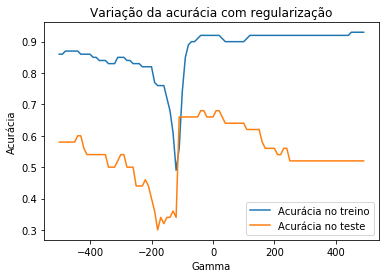

In [165]:
import matplotlib.pyplot as plt
import numpy as np

train_result = []
test_result = []
for i in range(-500,500,10):
    w = fit(iris_X_train,iris_Y_train,i)
    pred_train = predict(w,iris_X_train)
    train_result.append(eval(pred_train,transform_target(iris_Y_train)))
    pred_test = predict(w,iris_X_test)
    test_result.append(eval(pred_test,transform_target(iris_Y_test)))

x = list(range(-500,500,10))
plt.plot(x,train_result)
plt.plot(x,test_result)
plt.legend(['Acurácia no treino', 'Acurácia no teste'], loc='lower right')
plt.title("Variação da acurácia com regularização")
plt.xlabel('Gamma')
plt.ylabel('Acurácia')
plt.show()

&emsp; Conforme podemos ver no gráfico acima no conjunto de teste a maior acurácia alcançada foi de 68% com um gamma com valor 10. Com valores de gama negativo podemos notar um considerável piora nos resultados do modelo, conforme este valor vai aumentando chegamos a um pico na acurácia com os dados separados para teste e depois a preformance decai.

### 3.2 Hepatite

In [170]:
w = fit(hepatitis_X_train,hepatitis_Y_train,0)
pred_train = predict(w,hepatitis_X_train)
result_train = eval(pred_train,transform_target(hepatitis_Y_train))
pred_test = predict(w,hepatitis_X_test)
result_test = eval(pred_test,transform_target(hepatitis_Y_test))
print("Acurácia no conjunto de treino:", result_train)
print("Acurácia no conjunto de teste:", result_test)

Acurácia no conjunto de treino: 1.0
Acurácia no conjunto de teste: 1.0


&emsp; Dado o resultado obtido podemos notar que a classes de hepatite são facilmente linearmente separáveis

### 3.3 Diabetes

In [173]:
w = fit(diabetes_X_train,diabetes_Y_train,0)
pred_train = predict(w,diabetes_X_train)
train_result = eval(pred_train,transform_target(diabetes_Y_train))
pred_test = predict(w,diabetes_X_test)
test_result = eval(pred_test,transform_target(diabetes_Y_test))
print("Acurácia no conjunto de treino:", train_result)
print("Acurácia no conjunto de treino:", test_result)

Acurácia no conjunto de treino: 0.5471890623405775
Acurácia no conjunto de treino: 0.523459347488348


&emsp; Provavelmente devido a pouca quantidade de features para determinar cada classe podemos notar que o modelo não foi seque capaz de se ajustar o conjunto de treinamento. 

# 4. Código

## 4.1 Carregar os dados

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display, HTML

iris = pd.read_csv("data/iris.data",names=['sepal_length','sepal_width',
                                          'petal_length','petal_width','class'],na_values='?')

hepatitis = pd.read_csv("data/hepatitis.data",names=['class','age','sex','steroid','antivirals',
                                                     'fatigue','malaise','anorexia','liver_big',
                                                    'liver_firm','spleenn_palpable','spiders','ascites',
                                                    'varices','bilirubin','alk_phosphate','sgot',
                                                     'albumin','protine','histology'],na_values='?')


diabetes = pd.DataFrame()
for i in range(1,71):
    df_csv = pd.read_csv('data/Diabetes-Data/data-'+('0'+str(i) if i < 10 else str(i)),
                         sep="\t",
                        names=['date','time','code','value'],na_values='?')
    diabetes = pd.concat([diabetes,df_csv])
    

print("hepatitis")
display(hepatitis.head())
print("iris")
display(iris.head())
print("diabetes")
display(diabetes.head())

hepatitis


,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleenn_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protine,histology
0,2,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,2,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,2,31,1,NaN,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,2,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1


iris


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


diabetes


,date,time,code,value
0,04-21-1991,9:09,58,100
1,04-21-1991,9:09,33,9
2,04-21-1991,9:09,34,13
3,04-21-1991,17:08,62,119
4,04-21-1991,17:08,33,7


## 4.2 Pré-Processamento

In [2]:
# tornando classes do hepaite 0 ou 1
hepatitis['class'] = hepatitis['class']-1

# criando os valores binários para cada classe
iris = pd.concat([iris,pd.get_dummies(iris['class'])],axis=1)

prop = len(diabetes[~diabetes.time.str.contains(':')])/len(diabetes)*100
print("Percentual dos dados de diabetes que possuem formatação errada no campo time: ",prop)
# remoção de campos com valores errados
diabetes = diabetes[diabetes.time.str.contains(':')]
# conversão para o tipo data, removendo valores incorretos
diabetes['date'] = pd.to_datetime(diabetes['date'].str.strip(),format='%m-%d-%Y',errors='coerce')
# separação do campo hora e minuto
diabetes['hour'] = diabetes['time'].str.split(':').str[0].astype(int)
diabetes['minute'] = diabetes['time'].str.split(':').str[1].astype(int)
# one hot encode para os códigos
diabetes = pd.concat([diabetes,pd.get_dummies(diabetes['code'])],axis=1)
# removendo datas nulas
diabetes = diabetes[diabetes.date.notnull()]
# removendo valores da variavel alvo nulos
diabetes = diabetes[diabetes.value.notna()]
# transformando o value em numérico 
diabetes['value'] = pd.to_numeric(diabetes['value'],errors='coerce')

Percentual dos dados de diabetes que possuem formatação errada no campo time:  0.1125127855438118


#### Checagem de valores faltantes

In [3]:
print("iris dataset")
display(pd.DataFrame(iris.isnull().sum(),columns=['Missing values']))
print("diabetes dataset")
display(pd.DataFrame(diabetes.isnull().sum(),columns=['Missing values']))
print("hapatitis dataset")
display(pd.DataFrame(hepatitis.isnull().sum(),columns=['Missing values']))

iris dataset


,Missing values
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
class,0
Iris-setosa,0
Iris-versicolor,0
Iris-virginica,0


diabetes dataset


,Missing values
date,0
time,0
code,0
value,8
hour,0
minute,0
0,0
4,0
33,0
34,0


hapatitis dataset


,Missing values
class,0
age,0
sex,0
steroid,1
antivirals,0
fatigue,1
malaise,1
anorexia,1
liver_big,10
liver_firm,11


#### Preenchendo os valores desconhecidos com a média

In [4]:
hepatitis = hepatitis.fillna(hepatitis.mean())
diabetes = diabetes.fillna(diabetes.mean())

#### Separando entradas e alvos

In [5]:
# iris dataset
iris_X = iris[['sepal_length','sepal_width','petal_length','petal_width']]
iris_Y = iris[['Iris-setosa','Iris-versicolor','Iris-virginica']]

# diabetes
diabetes_X = diabetes[['hour','minute','value']]
diabetes_Y = diabetes[[0,4,33,34,35,36,48,56,57,58,59,60,61,62,63,
                       64,65,66,67,68,69,70,71,72]]
# hepatitis
hepatitis_X = hepatitis[hepatitis.columns.drop('class').tolist()]
hepatitis_Y = hepatitis['class']

#### Escalonamento dos dados

\begin{align}
\ X_{new} & = \frac {X -\mu} {\sigma} \\
\end{align}

In [6]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

# scaling the iris dataset
iris_scaled = scaler.fit_transform(iris_X)

# scaling the diabetes dataset
diabetes_scaled = scaler.fit_transform(diabetes_X)

# scaling hepatitis
hepatitis_scaled = scaler.fit_transform(hepatitis_X)

#### Divisão em treino e teste

In [7]:
from sklearn.model_selection import train_test_split

iris_X_train, iris_X_test, iris_Y_train, iris_Y_test = train_test_split(iris_scaled,
                                                                iris_Y,
                                                                test_size=0.33,
                                                                shuffle=False)
diabetes_X_train, diabetes_X_test, diabetes_Y_train, diabetes_Y_test = train_test_split(diabetes_scaled,
                                                                                diabetes_Y,
                                                                                test_size=0.33,
                                                                                shuffle=False)
hepatitis_X_train, hepatitis_X_test, hepatitis_Y_train, hepatitis_Y_test = train_test_split(hepatitis_scaled,
                                                                                    hepatitis_Y,
                                                                                    test_size=0.33,
                                                                                    shuffle=False)


## 4.3 Classificador

#### Pseudo inversa regularizada

\begin{align}
\ X_{new} & = \ (\frac{\gamma}{N}I+X^tX)^{-1}X^t \\
\end{align}

In [162]:
import numpy.linalg
def pseudo_inversa(X,gamma):
    """
    Recebe um DataFrame
    Retorna a pseudo inversa de uma matriz
    """
    
    xt_x = np.dot(X.T,X)
    reg = (gamma/len(X))*np.identity(len(xt_x))
    inverse = np.linalg.inv(reg+xt_x)
    pseudo = np.dot(inverse,X.T)
    return pseudo

#### Encontra os pesos

In [91]:
def fit(X,y,gamma):
    """
    Recebe o conjunto de treino e o alvo
    retorna os pesos
    """
    w = np.dot(pseudo_inversa(X,gamma),y)
    return w

#### Classifica os valores

In [97]:
def predict(w, data):
    """
    Recebe os pesos do modelo e os dados para classificar a entrada
    """
    result = []
    for i in data:
        result.append(np.argmax(np.dot(w.T,i)))
    return result

#### Avalia a acurácia do modelo

In [55]:
from sklearn.metrics import accuracy_score
def eval(pred, actual):
    """
    Avalia a acuracia do modelo
    """
    return accuracy_score(pred,actual)

#### Transforma a variável alvo para a avaliação do modelo

In [72]:
def transform_target(y):
    """
    Transforma a variavel alvo 
    """
     return [np.argmax(i) for i in y.as_matrix()]